In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import time
import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12.0, 6.0)

In [29]:
dframe2005 = pd.read_csv('tp1_sensordata_20_05.csv', sep=',', parse_dates=[1], header=None,
                         names=['datetime', 'sec', 'ms', 'event_type', 'event_subtype', 'sensor_id','z','x','y','value', 'something'])

dframe2005['datetime'] = pd.to_datetime(dframe2005['datetime'])
# calculate diff in seconds from day begin
dframe2005['seconddelta'] = dframe2005.datetime.map( lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second )
dframe2005['msseconddelta'] = dframe2005.seconddelta + dframe2005.ms/1000

dframe2005s4 = pd.DataFrame(dframe2005.loc[dframe2005['sensor_id'] == 4])

dframe2005s4['valuediff'] = dframe2005s4.value.diff()

In [30]:
#plt.axvline(x_position)
dframe2005s4.head()

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,something,seconddelta,msseconddelta,valuediff
5,2010-05-20 00:03:11,1274313791,20,R,0,4,703076,173,1,22.9,2130706433,191,191.020,NaN
25,2010-05-20 00:13:13,1274314393,445,R,0,4,703229,173,1,23.0,2130706433,793,793.445,0.1
46,2010-05-20 00:23:15,1274314995,869,R,0,4,703381,173,1,22.9,2130706433,1395,1395.869,-0.1
62,2010-05-20 00:33:18,1274315598,294,R,0,4,703527,173,1,22.9,2130706433,1998,1998.294,0.0
77,2010-05-20 00:43:20,1274316200,719,R,0,4,703672,173,1,23.0,2130706433,2600,2600.719,0.1


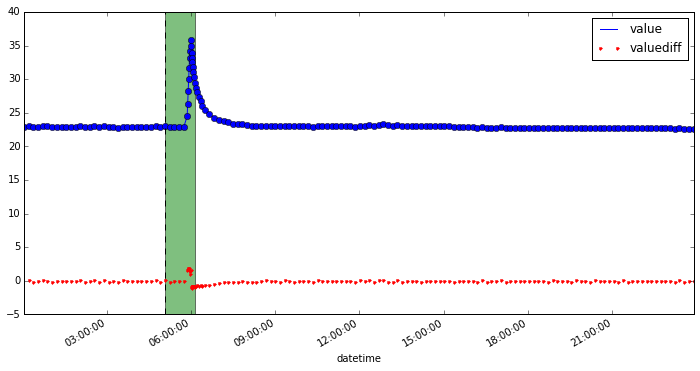

In [31]:
fig = plt.figure()
ax = dframe2005s4.plot(x='datetime', y='value', style='-', marker='o')
ax.axvline(dframe2005s4.datetime.values[30], color='k', linestyle='--')
ax.axvspan(dframe2005s4.datetime.values[30], dframe2005s4.datetime.values[50], facecolor='g', alpha=0.5)
dframe2005s4.plot(x='datetime', y='valuediff', style='.', color='r', ax=ax)
fig.set_title="blaaaaaaaaaaaa"
#plt.axvline(50)
plt.show(fig)

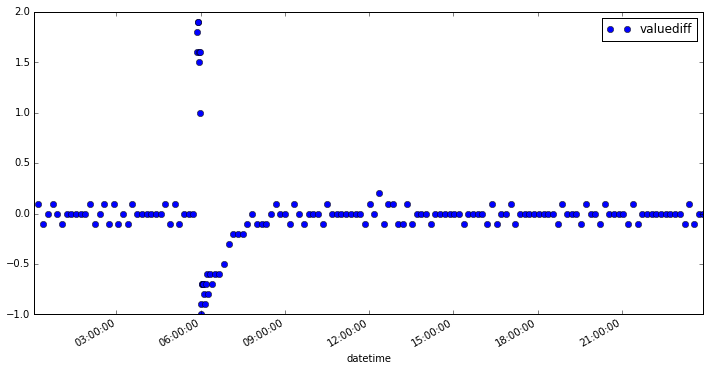

In [32]:
dframe2005s4.plot(x='datetime', y='valuediff', style='o')

In [33]:
dframe2005s4['valuediff'].describe()

count    160.000000
mean      -0.001875
std        0.439478
min       -1.000000
25%       -0.100000
50%        0.000000
75%        0.000000
max        1.900000
Name: valuediff, dtype: float64

In [34]:
dframe2005s4['valuediff'].values

array([ nan,  0.1, -0.1,  0. ,  0.1,  0. , -0.1,  0. ,  0. ,  0. ,  0. ,
        0. ,  0.1, -0.1,  0. ,  0.1, -0.1,  0.1, -0.1,  0. , -0.1,  0.1,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1, -0.1,  0.1, -0.1,  0. ,
        0. ,  0. ,  1.6,  1.8,  1.9,  1.9,  1.6,  1.5,  1. ,  1.6, -0.9,
       -1. , -0.7, -0.7, -0.7, -0.7, -0.8, -0.9, -0.7, -0.6, -0.8, -0.6,
       -0.7, -0.6, -0.6, -0.5, -0.3, -0.2, -0.2, -0.2, -0.1,  0. , -0.1,
       -0.1, -0.1,  0. ,  0.1,  0. ,  0. , -0.1,  0.1,  0. , -0.1,  0. ,
        0. ,  0. , -0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
       -0.1,  0.1,  0. ,  0.2, -0.1,  0.1,  0.1, -0.1, -0.1,  0.1, -0.1,
        0. ,  0. ,  0. , -0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.1,
        0. ,  0. ,  0. ,  0. , -0.1,  0.1, -0.1,  0. ,  0. ,  0.1, -0.1,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.1,  0.1,  0. ,
        0. ,  0. , -0.1,  0.1,  0. ,  0. , -0.1,  0.1,  0. ,  0. ,  0. ,
        0. , -0.1,  0.1, -0.1,  0. ,  0. ,  0. ,  0

In [35]:
from collections import defaultdict
ser = dframe2005s4['valuediff'].value_counts()
    #print a, dframe2005s4['valuediff'].value_counts()[a]

# iterate over all values and create abs dict D
D = defaultdict(int)
for key in ser.index.values:
    rkey = round(key,1)
    print abs(rkey), ser[key]
    D[abs(rkey)] += ser[key]

print "iteration done.\n"

# global counter
gc = 0
for k in D:
    print k, D[k]
    gc += D[k]
    
print 'global counter: ', gc

values_to_filterout = []
for k in D:
    print k, D[k], ',%:',(100*D[k])/gc
    # if bigger than 10% add to valies to filterout
    if (100*D[k])/gc > 30:
        values_to_filterout.append(k)

print '---'
# check values to filter out
for v in values_to_filterout:
    print v
    
print 'max: ', max(values_to_filterout), ' max*2: ', max(values_to_filterout)*2

0.0 77
0.1 21
0.1 16
0.1 11
0.1 6
0.7 4
0.6 2
0.8 2
0.2 2
0.6 2
0.7 1
1.5 1
0.5 1
1.0 1
0.9 1
0.2 1
1.9 1
1.9 1
0.3 1
1.6 1
1.6 1
1.6 1
0.7 1
1.0 1
0.2 1
1.8 1
0.9 1
iteration done.

0.0 77
1.5 1
0.8 2
0.2 4
1.0 2
1.6 3
0.3 1
1.8 1
0.6 4
0.1 54
0.9 2
1.9 2
0.7 6
0.5 1
global counter:  160
0.0 77 ,%: 48
1.5 1 ,%: 0
0.8 2 ,%: 1
0.2 4 ,%: 2
1.0 2 ,%: 1
1.6 3 ,%: 1
0.3 1 ,%: 0
1.8 1 ,%: 0
0.6 4 ,%: 2
0.1 54 ,%: 33
0.9 2 ,%: 1
1.9 2 ,%: 1
0.7 6 ,%: 3
0.5 1 ,%: 0
---
0.0
0.1
max:  0.1  max*2:  0.2


In [36]:
# TODO: take max value from values_to_filter_out
# 0.0001 is needed to round value
def valuation_formula(diff):
    if abs(diff) <= max(values_to_filterout)*2 + 0.00001:
        return 0
    else:
        return diff
    
dframe2005s4['valuediffauto'] = dframe2005s4.apply(lambda row: valuation_formula(row['valuediff']), axis=1)

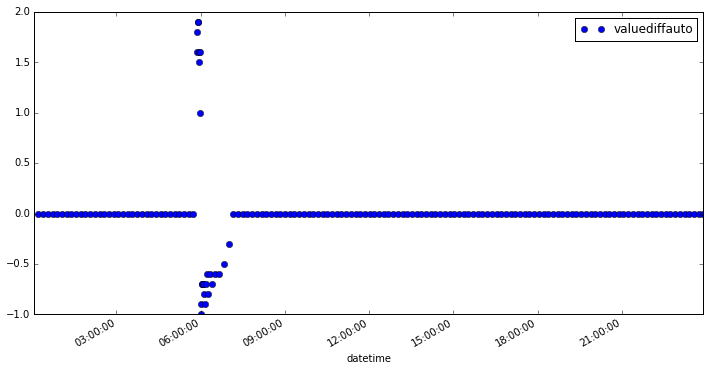

In [37]:
dframe2005s4.plot(x='datetime', y='valuediffauto', style='o')

In [38]:
dframe2005s4['valuediffauto'].value_counts()

 0.0    135
-0.7      4
-0.6      2
-0.8      2
-0.6      2
-0.3      1
 1.5      1
 1.6      1
-0.5      1
 1.6      1
-0.7      1
-1.0      1
 1.0      1
 1.6      1
-0.9      1
 1.8      1
 1.9      1
 1.9      1
-0.7      1
-0.9      1
dtype: int64

In [39]:
dframe2005s4['valuebit'] = dframe2005s4.valuediffauto.map( lambda x: x > 0 )

In [40]:
prev_row = {}
prev_row['value'] = 'null'
prev_row['valuediffauto'] = 0.0
index = -1
output = index
def block_cooking(row):
    global prev_row, index, output
    #if prev_row is None: prev_row['value'] = 'none'
    
    # if prev <=0.0 && this > 0.0
    # index = 0
    # return index 
    # index++
    if prev_row['valuediffauto'] <= 0.0 and row['valuediffauto'] > 0.0:
        index = 0
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
        index += 1
    # else if prev >= 0.0 && this > 0.0
    # return index
    # index++
    elif prev_row['valuediffauto'] >= 0.0 and row['valuediffauto'] > 0.0:
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
        index += 1
    # else if this < 0.0
    # index = 0
    elif row['valuediffauto'] < 0.0:
        index = -1
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
    # DEBUG
    elif prev_row['valuediffauto'] >= 0.0 and row['valuediffauto'] == 0.0:
        index = -1
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
    else:
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
        output = index
    
    prev_row = row
    return output
    #if row['valuediffauto'] <= 0.0:
    #    print 'valuediffnegativ'
    
dframe2005s4['blockevent_counter'] = dframe2005s4.apply(lambda row: block_cooking(row), axis=1)

2010-05-20 00:03:11 nan 22.9 , prev:  null , index:  -1
2010-05-20 00:13:13 0.0 23.0 , prev:  22.9 , index:  -1
2010-05-20 00:23:15 0.0 22.9 , prev:  23.0 , index:  -1
2010-05-20 00:33:18 0.0 22.9 , prev:  22.9 , index:  -1
2010-05-20 00:43:20 0.0 23.0 , prev:  22.9 , index:  -1
2010-05-20 00:53:23 0.0 23.0 , prev:  23.0 , index:  -1
2010-05-20 01:03:26 0.0 22.9 , prev:  23.0 , index:  -1
2010-05-20 01:13:28 0.0 22.9 , prev:  22.9 , index:  -1
2010-05-20 01:23:31 0.0 22.9 , prev:  22.9 , index:  -1
2010-05-20 01:33:33 0.0 22.9 , prev:  22.9 , index:  -1
2010-05-20 01:43:36 0.0 22.9 , prev:  22.9 , index:  -1
2010-05-20 01:53:38 0.0 22.9 , prev:  22.9 , index:  -1
2010-05-20 02:03:42 0.0 23.0 , prev:  22.9 , index:  -1
2010-05-20 02:13:44 0.0 22.9 , prev:  23.0 , index:  -1
2010-05-20 02:23:46 0.0 22.9 , prev:  22.9 , index:  -1
2010-05-20 02:33:49 0.0 23.0 , prev:  22.9 , index:  -1
2010-05-20 02:43:51 0.0 22.9 , prev:  23.0 , index:  -1
2010-05-20 02:53:54 0.0 23.0 , prev:  22.9 , ind

In [41]:
# filter out single temperature increases
row_array_index_counter = 0
for row_index in dframe2005s4.index.values:
    # check end index
    if row_array_index_counter + 1 < len(dframe2005s4.index.values):
        thisrow = dframe2005s4.ix[row_index]['blockevent_counter']
        nextrow = dframe2005s4.ix[dframe2005s4.index.values[row_array_index_counter+1]]['blockevent_counter']
        #print "this:", thisrow, ", next: ",nextrow
        if thisrow == 0 and nextrow == -1:
            # set to -1
            dframe2005s4.ix[row_index,'blockevent_counter'] = -1

    # increase
    row_array_index_counter += 1

In [42]:
from itertools import cycle
li = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
running = True
licycle = cycle(li)
# Prime the pump
#nextelem = licycle.next()
prev_row = {}
prev_row['value'] = 'null'
prev_row['blockevent_counter'] = -1
block = 0
output = index
def block_cooking(row):
    global prev_row, block, output, nextelem

    if row['blockevent_counter'] == -1:
        nextelem = np.nan
    elif row['blockevent_counter'] == 0  and prev_row['blockevent_counter'] == -1: 
        nextelem = licycle.next()
        
    print row['datetime'],',', row['valuediffauto'],',', row['value'], ', blockcounter: ', row['blockevent_counter'], ',',nextelem
    prev_row = row
    return nextelem
    
dframe2005s4['cooking_event'] = dframe2005s4.apply(lambda row: block_cooking(row), axis=1)

2010-05-20 00:03:11 , nan , 22.9 , blockcounter:  -1 , nan
2010-05-20 00:13:13 , 0.0 , 23.0 , blockcounter:  -1 , nan
2010-05-20 00:23:15 , 0.0 , 22.9 , blockcounter:  -1 , nan
2010-05-20 00:33:18 , 0.0 , 22.9 , blockcounter:  -1 , nan
2010-05-20 00:43:20 , 0.0 , 23.0 , blockcounter:  -1 , nan
2010-05-20 00:53:23 , 0.0 , 23.0 , blockcounter:  -1 , nan
2010-05-20 01:03:26 , 0.0 , 22.9 , blockcounter:  -1 , nan
2010-05-20 01:13:28 , 0.0 , 22.9 , blockcounter:  -1 , nan
2010-05-20 01:23:31 , 0.0 , 22.9 , blockcounter:  -1 , nan
2010-05-20 01:33:33 , 0.0 , 22.9 , blockcounter:  -1 , nan
2010-05-20 01:43:36 , 0.0 , 22.9 , blockcounter:  -1 , nan
2010-05-20 01:53:38 , 0.0 , 22.9 , blockcounter:  -1 , nan
2010-05-20 02:03:42 , 0.0 , 23.0 , blockcounter:  -1 , nan
2010-05-20 02:13:44 , 0.0 , 22.9 , blockcounter:  -1 , nan
2010-05-20 02:23:46 , 0.0 , 22.9 , blockcounter:  -1 , nan
2010-05-20 02:33:49 , 0.0 , 23.0 , blockcounter:  -1 , nan
2010-05-20 02:43:51 , 0.0 , 22.9 , blockcounter:  -1 , n

In [43]:
dframe2005s4['timediff'] = dframe2005s4.datetime.diff()
dframe2005s4['msseconddeltadiff'] = dframe2005s4.msseconddelta.diff()

In [44]:
grp = dframe2005s4.groupby('cooking_event').sum()

In [45]:
for g, ce in zip(grp.index, grp.index.values):
    print 'cooking group:', g, 'seconds:', grp['msseconddeltadiff'][ce], 'minutes: ', grp['msseconddeltadiff'][ce]/60

cooking group: A seconds: 871.216 minutes:  14.5202666667


In [19]:
# cooking longer than 10min (number of clusters)
print grp[grp.msseconddeltadiff > 600].index.values

['A']


In [ ]:
data = CT
# clustering
thresh = 1000
clusters = hcluster.fclusterdata(data, thresh, criterion="distance")

# plotting
plt.scatter(*np.transpose(data), c=clusters)
plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()